Example of genetic art code porting to Python.

In [1]:


import numpy as np
from PIL import Image
from IPython.display import display

from quaternion import Quaternions
from op_map import formula_to_op_tree, OpDescr, QOP_tree, r_dispatch



In [2]:
# define image shape
img_height = 900
img_width = 1600
aa_scale = 3
width= aa_scale * img_width
height = aa_scale * img_height
depth = 1
data_shape = (width, height, 1)


In [3]:
# formula_str = "( A2 ( mod golden x+iy ) ( /( +( +( A1 j y+k ) y+k ) y+k ) x+iy ) )"
# formula_str = "( A2 ( -( *( conj( / x+k( - j( / x+k( / x+iy+jx+ky j ) ) ) ) )( + x+iy( exp( /( / x+k( / x+iy+jx+ky j ) ) x+iy ) ) ) )( / x+k x+iy ) ) ( / x+k( / x+iy y+k ) ) )"
# formula_str = "( exp ( iexp( *( isin( exp( A2( isin( exp( A2( inv golden )( ilog x+iy+jx+ky ) ) ) )( ilog x+iy+jx+ky ) ) ) )( / x+iy( - j( / x+iy+jx+ky j ) ) ) ) ) )"
formula_str = "( mod ( iexp( mod( *( iexp( isin( * k x+iy+jx+ky ) ) )( conj x+iy ) )( mod( iexp( conj golden ) )( conj golden ) ) ) ) ( mod( *( /( + i( floor( / j( /( exp( iexp( / x+iy( imax( iexp( rolL( iexp( *( normp( exp( iexp( isin( / j( *( imax( iexp( rolL( iexp( *( normp( exp( iexp( isin( floor x+iy+jx+ky ) ) ) ) )( normp( exp( iexp( isin( / j( *( floor x+iy+jx+ky )( + i( *( exp x+iy+jx+ky )( mod( iexp( exp x+iy+jx+ky ) )( + i x+iy+jx+ky ) ) ) ) ) ) ) ) ) ) ) ) ) )( inv x+iy ) )( + i( conj x+iy ) ) ) ) ) ) ) )( normp( exp( iexp( /( / x+iy( /( exp( iexp( / x+iy( imax( iexp( rolL( iexp( *( conj golden )( normp( exp( iexp( isin( isin( * k x+iy+jx+ky ) ) ) ) ) ) ) ) ) )( inv x+iy ) ) ) ) ) j ) ) j ) ) ) ) ) ) ) )( inv x+iy ) ) ) ) )( iexp( exp( iexp( isin( * k x+iy+jx+ky ) ) ) ) ) ) ) ) ) j )( inv x+iy ) )( / golden( /( / x+iy( /( exp( iexp( / x+iy( imax( iexp( rolL( iexp( *( conj golden )( normp( exp( iexp( isin( / j( *( floor x+iy+jx+ky )( + i( conj x+iy ) ) ) ) ) ) ) ) ) ) ) )( inv x+iy ) ) ) ) )( iexp( exp( iexp( isin( * k x+iy+jx+ky ) ) ) ) ) ) ) j ) ) ) )"

In [4]:
op_tree = formula_to_op_tree(formula_str)


In [5]:
# build data tensors
min_port = np.min([width, height])
x_vec = np.linspace(start=-0.5 * (width/min_port), stop=0.5 * (width/min_port), num=width)
y_vec = np.linspace(start=-0.5 * (height/min_port), stop=0.5 * (height/min_port), num=height)
z_vec = np.zeros(1)

x = np.zeros(data_shape)
y = np.zeros(data_shape)
z = np.zeros(data_shape)

for xi in range(width):
    for yi in range(height):
        for zi in range(depth):
            x[xi][yi][zi] = x_vec[xi]
            y[xi][yi][zi] = y_vec[yi]
            z[xi][yi][zi] = z_vec[zi]

In [6]:
res = r_dispatch(op_tree, data_shape=data_shape)

In [7]:
res_q = res.eval_tree(x=x, y=y, z=z)

In [8]:
# define image shape
image_shape = (width, height, 3)
# copy result into image
img_tensor = np.zeros(image_shape)
for xi in range(width):
    for yi in range(height):
        img_tensor[xi][yi][0] = res_q.i[xi][yi][0]
        img_tensor[xi][yi][1] = res_q.j[xi][yi][0]
        img_tensor[xi][yi][2] = res_q.k[xi][yi][0]

In [9]:
# move to 0 to 255 integers
img_tensor = np.maximum(-100, img_tensor)
img_tensor = np.minimum(100, img_tensor)
img_tensor = np.round(256 / (1 + np.exp(-img_tensor)))
img_tensor = np.maximum(img_tensor, 0)
img_tensor = np.minimum(img_tensor, 255)


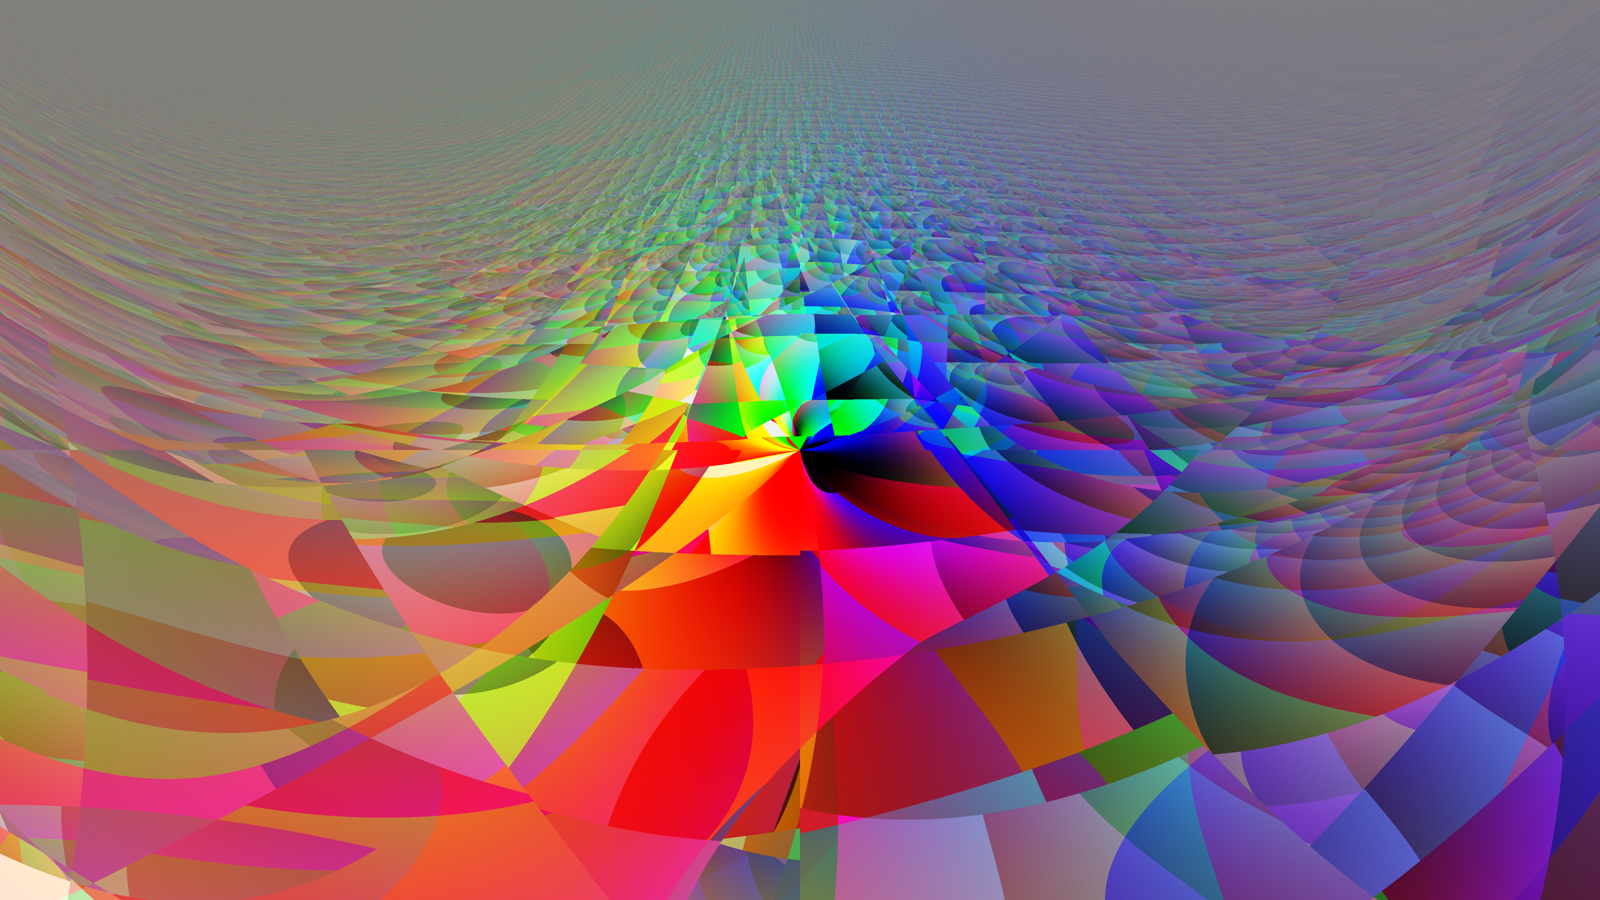

In [10]:
img = Image.new("RGB", size=(width, height))
pixels = []
for yi in range(height):
    for xi in range(width):
        pixels.append((int(img_tensor[xi][yi][0]), int(img_tensor[xi][yi][1]), int(img_tensor[xi][yi][2])))
img.putdata(pixels)
if aa_scale > 1:
    img = img.resize((img_width, img_height))
display(img)